In [2]:
# Python 3.8
import pandas as pd
import numpy  as np
np.bool = np.bool_

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
df = pd.read_csv('./concrete_nan.csv', # путь к файлу, (используй автодотолнение)
                   sep='^', # разделитель данных в файле
                   decimal=',',
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header=None, # если заголовки отсутствуют
                   # na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[10:20] # отобразить первые строки таблицы df 

,Cement (component 1)(kg in a m3 mixture),Blast Furnace Slag (component 2)(kg in a m3 mixture),Fly Ash (component 3)(kg in a m3 mixture),Water (component 4)(kg in a m3 mixture),Superplasticizer (component 5)(kg in a m3 mixture),Coarse Aggregate (component 6)(kg in a m3 mixture),Fine Aggregate (component 7)(kg in a m3 mixture),Age (day),Concrete compressive strength(MPa^ megapascals)
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90.0,"38,07"
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,"28,02"
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270.0,"43,01"
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90.0,NaN
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0,"47,81"
15,NaN,0.0,0.0,228.0,0.0,932.0,670.0,90.0,"52,91"
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90.0,"39,36"
17,342.0,NaN,0.0,228.0,0.0,932.0,670.0,365.0,"56,14"
18,380.0,95.0,0.0,228.0,0.0,932.0,594.0,90.0,"40,56"
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180.0,"42,62"


In [3]:
df["Concrete compressive strength(MPa^ megapascals) "] = df["Concrete compressive strength(MPa^ megapascals) "].str.replace(',','.')
df["Concrete compressive strength(MPa^ megapascals) "] = df["Concrete compressive strength(MPa^ megapascals) "].str.replace('.kein','.0')
df["Concrete compressive strength(MPa^ megapascals) "] = pd.to_numeric(df["Concrete compressive strength(MPa^ megapascals) "])

In [4]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (997, 9)


In [5]:
colNamesList = ['Cement',
    'Blast_Furnace_Slag',
    'Fly_Ash',
    'Water',
    'Superplasticizer',
    'Coarse_Aggregate',
    'Fine_Aggregate',
    'Age',
    'Concrete_compressive_strength']

df.columns = (  colNamesList )

In [6]:
features = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash',  'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age']
target   = ['Concrete_compressive_strength']
df = df [features+target]
df[:10]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.00
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29


In [7]:
df[:10]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.00
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         997 non-null    float64
 1   Blast_Furnace_Slag             997 non-null    float64
 2   Fly_Ash                        997 non-null    float64
 3   Water                          997 non-null    float64
 4   Superplasticizer               997 non-null    float64
 5   Coarse_Aggregate               997 non-null    float64
 6   Fine_Aggregate                 997 non-null    float64
 7   Age                            997 non-null    float64
 8   Concrete_compressive_strength  997 non-null    float64
dtypes: float64(9)
memory usage: 77.9 KB


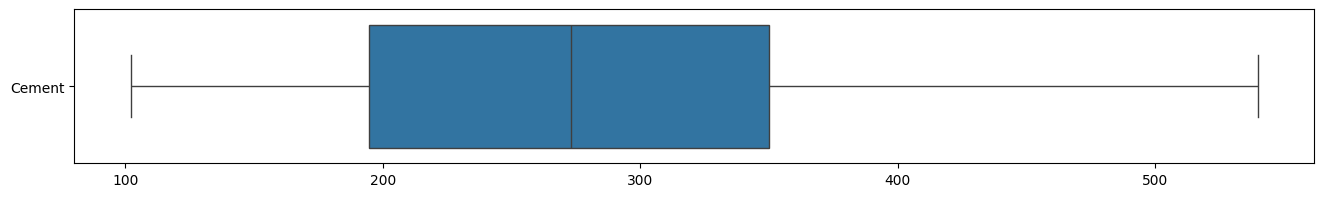

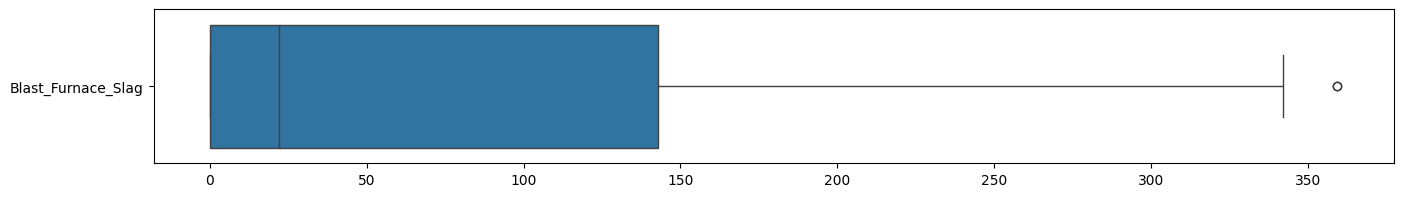

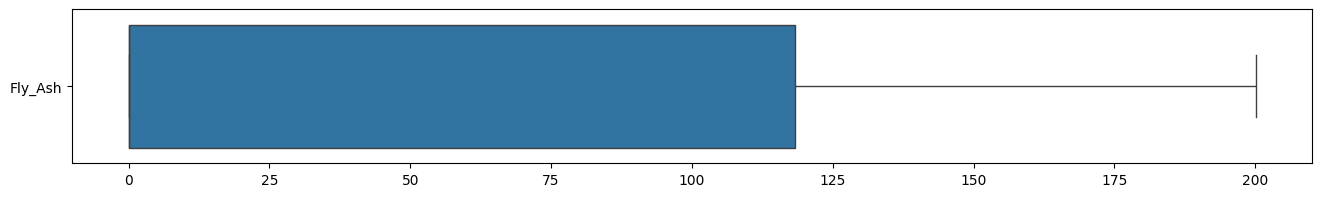

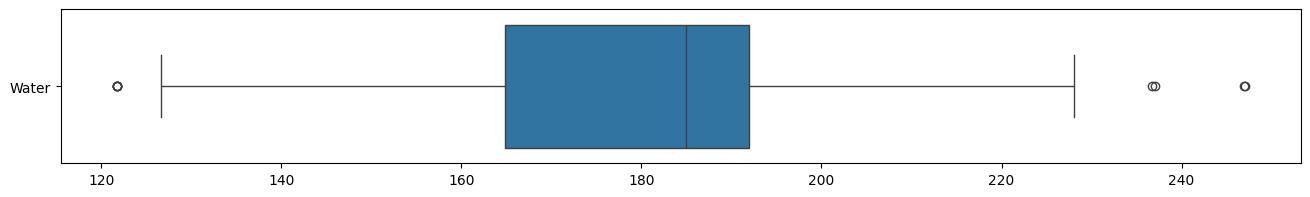

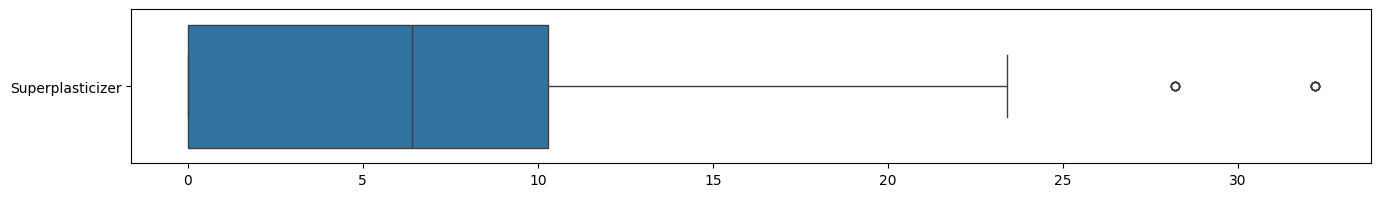

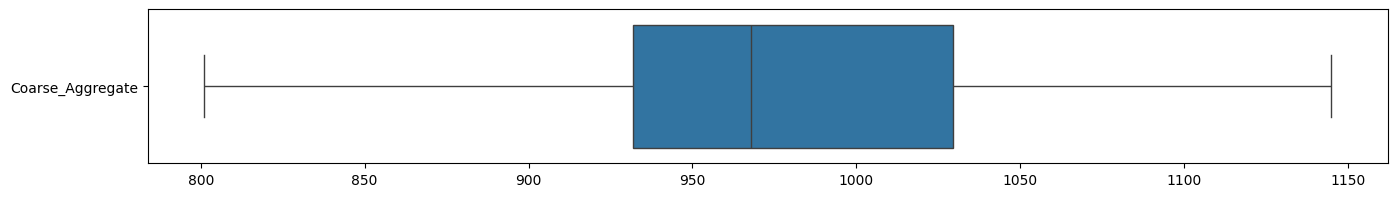

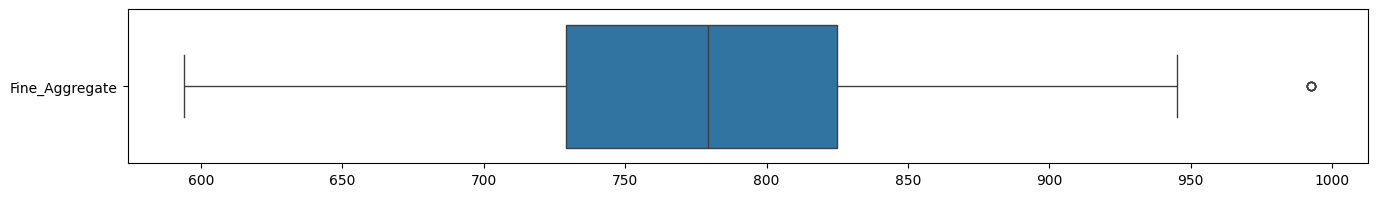

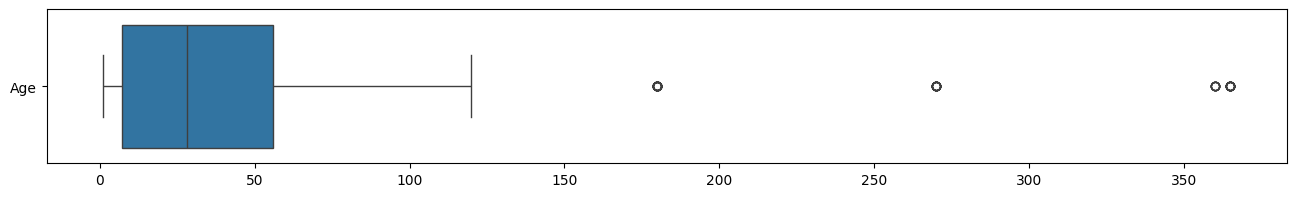

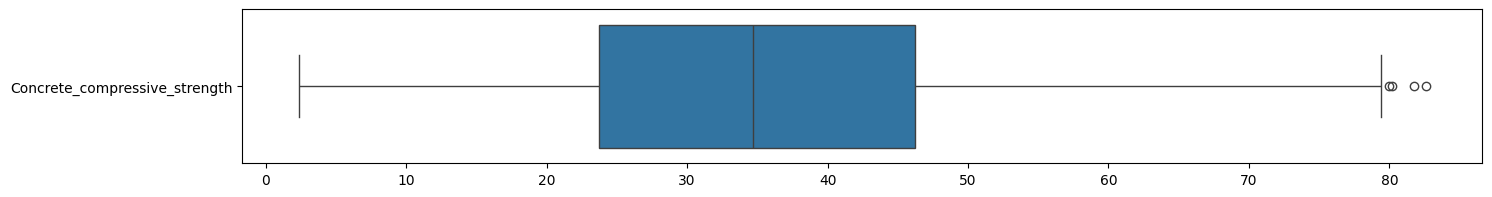

In [9]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):
    
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))
    
    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df[[feature_name]], # данные
                 orient='h' # ориентация графика
               )

In [10]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = {
    'Cement'     : (102,535)            ,
    'Blast_Furnace_Slag' : (0,340),
    'Fly_Ash' : (0,200),
    'Coarse_Aggregate' : (800,1145),
    'Fine_Aggregate' : (590,945),
    'Superplasticizer' : (0, 24)     ,
    'Age'  : (0, 120)        ,
    'Water'     : (125,230) ,
    'Concrete_compressive_strength' : (2,79),
}

print (tressholdDict)

{'Cement': (102, 535), 'Blast_Furnace_Slag': (0, 340), 'Fly_Ash': (0, 200), 'Coarse_Aggregate': (800, 1145), 'Fine_Aggregate': (590, 945), 'Superplasticizer': (0, 24), 'Age': (0, 120), 'Water': (125, 230), 'Concrete_compressive_strength': (2, 79)}


In [11]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df[
                            ~((df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

Cement. Принимаем пороговые значение равными (102, 535).
  Кол-во эл. вне пороговых - 9 из 997 значение(ий) (0.9%)

Blast_Furnace_Slag. Принимаем пороговые значение равными (0, 340).
  Кол-во эл. вне пороговых - 4 из 997 значение(ий) (0.4%)

Fly_Ash. Принимаем пороговые значение равными (0, 200).
  Кол-во эл. вне пороговых - 1 из 997 значение(ий) (0.1%)

Coarse_Aggregate. Принимаем пороговые значение равными (800, 1145).
  Кол-во эл. вне пороговых - 0 из 997 значение(ий) (0.0%)

Fine_Aggregate. Принимаем пороговые значение равными (590, 945).
  Кол-во эл. вне пороговых - 5 из 997 значение(ий) (0.5%)

Superplasticizer. Принимаем пороговые значение равными (0, 24).
  Кол-во эл. вне пороговых - 10 из 997 значение(ий) (1.0%)

Age. Принимаем пороговые значение равными (0, 120).
  Кол-во эл. вне пороговых - 57 из 997 значение(ий) (5.7%)

Water. Принимаем пороговые значение равными (125, 230).
  Кол-во эл. вне пороговых - 9 из 997 значение(ий) (0.9%)

Concrete_compressive_strength. Принимаем 

In [12]:

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]
    
    
    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df = df[ 
        (df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax) 
        ]
    print("Обработан ", feature_name )
    
    
print ("Осталось {} строк.".format(
    len(df))
)

Обработан  Cement
Обработан  Blast_Furnace_Slag
Обработан  Fly_Ash
Обработан  Coarse_Aggregate
Обработан  Fine_Aggregate
Обработан  Superplasticizer
Обработан  Age
Обработан  Water
Обработан  Concrete_compressive_strength
Осталось 896 строк.


In [13]:
df_save = df.copy()

In [14]:
df_save[:2]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45


In [15]:
df_save.to_csv('./concrete_nan_PREPARED2.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

In [16]:
df_save[:10]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90.0,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,28.02
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0,47.81
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90.0,39.36
18,380.0,95.0,0.0,228.0,0.0,932.0,594.0,90.0,40.56
21,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28.0,28.24


In [3]:
df_test = pd.read_csv(
    './concrete_nan_PREPARED2.csv', # путь к файлу через символ "/", (используйте автодополнение)
    sep       = ',' ,
    decimal   = '.' ,
    header    = 0,
)

df_test[:2] # отобразить первые строки таблицы df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
1,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45


In [4]:
df_test.sample(n=10)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
550,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
274,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,100.0,50.08
788,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28.0,28.99
889,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28.0,39.46
27,310.0,0.0,0.0,192.0,0.0,971.0,850.6,3.0,9.87
709,154.0,144.0,112.0,220.0,10.0,923.0,658.0,28.0,16.50
850,147.8,175.1,0.0,171.2,2.2,1000.0,828.5,28.0,26.92
782,146.0,173.0,0.0,182.0,3.0,986.0,817.0,28.0,23.74
488,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28.0,38.70
748,261.0,100.0,78.0,201.0,9.0,864.0,761.0,28.0,32.40


In [19]:
df_test.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,274.089509,73.025781,58.441071,180.599442,6.277232,974.720759,777.884263,32.087054,34.577522
std,99.830270,85.655693,64.066380,18.817971,5.310644,76.910698,74.853098,28.336115,16.263223
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.600000,0.000000,0.000000,164.900000,0.000000,932.000000,744.150000,7.000000,22.522500
50%,255.150000,20.000000,0.000000,184.000000,7.000000,968.000000,780.100000,28.000000,33.400000
75%,339.000000,144.700000,118.300000,192.000000,10.300000,1029.550000,824.250000,28.000000,44.445000
max,528.000000,316.100000,200.000000,228.000000,22.100000,1145.000000,945.000000,120.000000,78.800000


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         896 non-null    float64
 1   Blast_Furnace_Slag             896 non-null    float64
 2   Fly_Ash                        896 non-null    float64
 3   Water                          896 non-null    float64
 4   Superplasticizer               896 non-null    float64
 5   Coarse_Aggregate               896 non-null    float64
 6   Fine_Aggregate                 896 non-null    float64
 7   Age                            896 non-null    float64
 8   Concrete_compressive_strength  896 non-null    float64
dtypes: float64(9)
memory usage: 63.1 KB
